In [6]:
import pandas as pd
pd.set_option('display.max_columns', 300)

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')   
import scipy.stats as stats
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.metrics import mean_squared_error
from math import radians, cos, sin, asin, sqrt
from geopy.distance import great_circle


In [7]:
listing_df = pd.read_csv('listings.csv')

In [8]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(sample)


NameError: name 'sample' is not defined

In [250]:
pd.set_option('display.max_columns', 20)

In [429]:
listing_df[listing_df.price > 3000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5,15199,Self catering apartment,59694,Alexa,NaN,Ward 115,-33.91044,18.41239,Entire home/apt,124995,14,2,2016-04-15,0.03,1,364
11,15704,Hollywood Mansion & Spa Camps Bay with Butler,61441,Kevin,NaN,Ward 54,-33.96462,18.37595,Entire home/apt,17902,4,1,2017-11-14,0.03,7,306
17,19398,Apartments on the Beach,73779,Roger,NaN,Ward 23,-33.73046,18.43966,Entire home/apt,5712,5,0,NaN,NaN,1,365
18,19561,Apartment in Durbanville,74188,Cherry,NaN,Ward 103,-33.84192,18.67661,Private room,3389,2,0,NaN,NaN,1,365
20,19811,MARINA VIEWS,74863,Nigel,NaN,Ward 64,-34.08428,18.47585,Entire home/apt,4694,14,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24033,43359713,*Special Rate* An Intimate space for lockdown,325262590,Chad,NaN,Ward 74,-34.01306,18.34072,Entire home/apt,4493,3,0,NaN,NaN,2,362
24035,43361480,Brand New Ocean View Villa - 4 bed w Pool & Ga...,12942450,Rich,NaN,Ward 74,-34.03907,18.36526,Entire home/apt,8997,3,0,NaN,NaN,1,248
24040,43385762,Villa Roku. Cape architectural masterpiece.,345670077,Nico,NaN,Ward 54,-33.96599,18.38153,Entire home/apt,13086,2,0,NaN,NaN,1,365
24065,43484784,Ultimate designer home / work / film location!,19745781,Nicholas Sadleir,NaN,Ward 54,-33.92016,18.38954,Entire home/apt,4000,2,1,2020-05-25,1.00,5,90


In [466]:
listing_df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [252]:
listing_df.shape

(24079, 16)

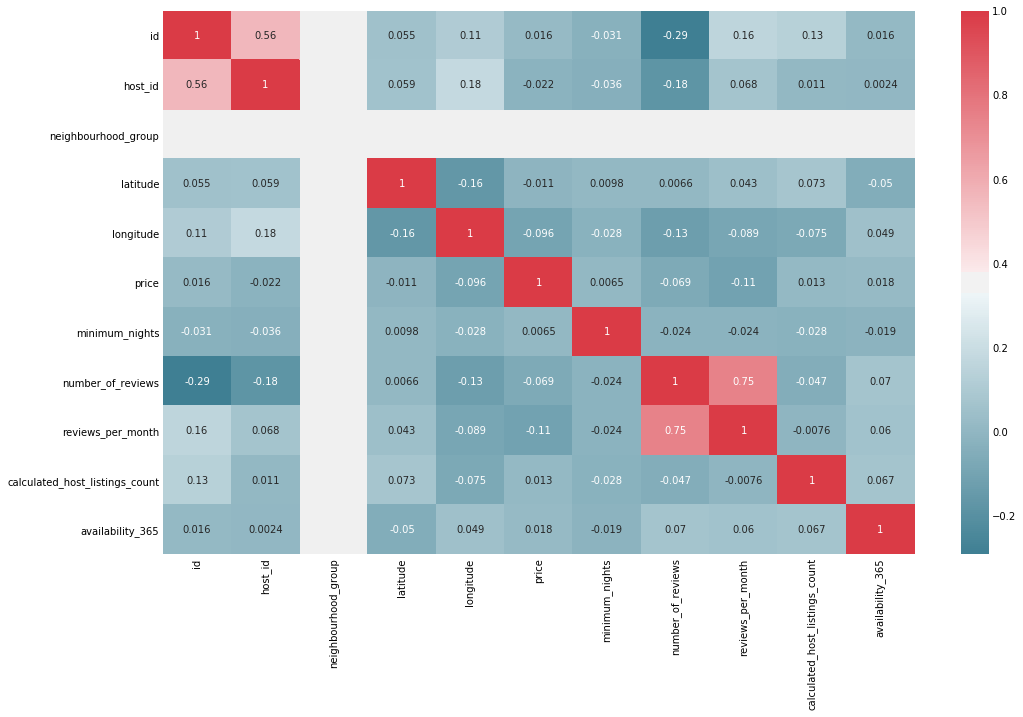

In [253]:
# Baseline Correlation heatmap 

def correlation_heatmap(df):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(listing_df)

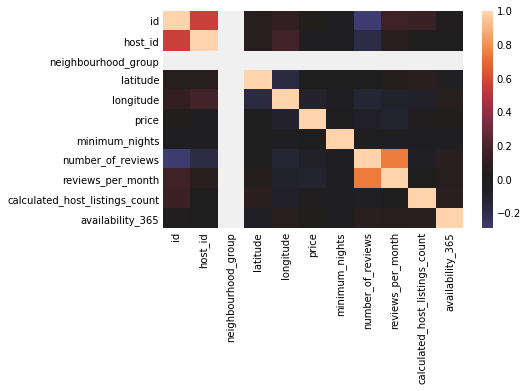

In [254]:
import seaborn as sns
sns.heatmap(listing_df.corr(), center=0);

In [289]:
#Dealing with NAs 
listing_df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             3
neighbourhood_group               24079
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        6823
reviews_per_month                  6823
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [458]:
#because the data set is over 24k, I decided to drop the nan values of reviews and last review (the same rows were nan for each)
listing_df.dropna(subset = ['reviews_per_month', 'last_review'], axis = 0, inplace = True)


In [459]:
listing_df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             1
neighbourhood_group               17255
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
price_usd                             0
availability_log                      0
price_log                             0
dtype: int64

In [292]:
listing_df.shape

(17256, 16)

In [295]:
#for neighbourhood_group I plan to imput values based on the Wards, grouping them by where in Capetown they are


In [403]:
#Air BNB zar conversion rate is 14.3 (current rate is 16.5)
listing_df['price_usd'] = listing_df.price.apply(lambda x: x/14.23 if x>= 3000 else x)

In [447]:

listing_df[listing_df.price_usd == 0.0]

#closed listing does not exist 9775 is 20685098
listing_df.drop(9775, inplace = True)


In [448]:
#listing append 9808 is 20736711 price is 121 USD, minimum night 7
listing_df.at[9808, 'price_usd'] = 121
listing_df.at[9808, 'minimum_nights'] = 7

In [465]:
listing_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'price_usd', 'availability_log', 'price_log'],
      dtype='object')

In [483]:
listing_df = pd.get_dummies(listing_df, columns=['room_type'])

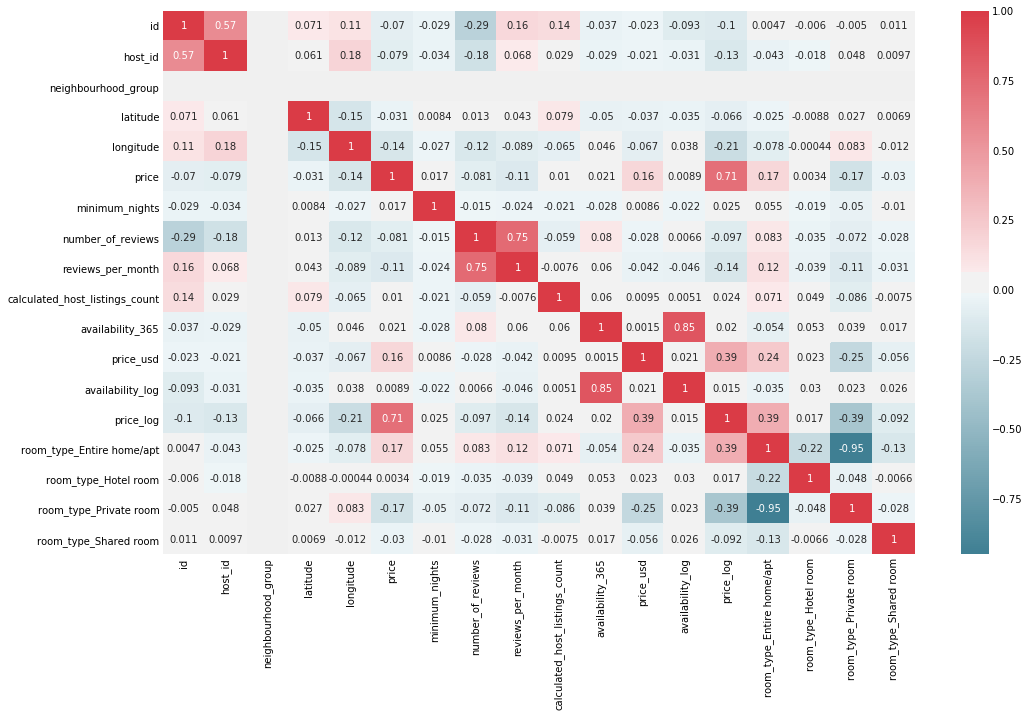

In [494]:
correlation_heatmap(listing_df)

In [496]:
listing_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price_usd',
       'availability_log', 'price_log', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

In [662]:
listing_df.neighbourhood = listing_df.neighbourhood.map(lambda x: x.replace('Ward', ''))

In [668]:
listing_df.neighbourhood = listing_df.neighbourhood.astype(int)

AttributeError: 'Series' object has no attribute 'neighbourhood'

In [669]:
listing_df.neighbourhood

AttributeError: 'Series' object has no attribute 'neighbourhood'

In [661]:
#city center wards df['city_center'] = wards == 77,54,115
#listing_df['neighbourhood_group'] = listing_df['neighbourhood_group'].map(lambda x: if x == 74]
                                                                          
#[74, 77, 54, 57, 59, 58, 60, 47, 46, 48, 49, 52, 51, 53, 56, 50, 31, 40, 41, 42, 44, 45]
#Metro_North = [4, 5, 1, 27, 26, 30, 28]
#Metro_South = [69, 71, 62, 73, 72, 63, 66, 65, 67, 80, 33, 38, 34, 37, 43] 





In [504]:
listing_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price_usd',
       'availability_log', 'price_log', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

In [583]:
#distance from city center
# 33.9249° S, 18.4241° E cape town city center


In [607]:
latCC = -33.9249
lonCC = 18.4241

from geopy.distance import great_circle
city_center = (-33.9249,18.4241)
listing_df['distance_cc'] = listing_df[['latitude', 'longitude']].apply(lambda x: great_circle(city_center, 
                                                                                               (x['latitude'], x['longitude'])).miles, axis = 1)



In [608]:
listing_df['distance_cc']

0         3.356482
1         8.879955
3         5.980151
5         1.203734
6         7.868755
           ...    
23836     0.506106
23849    11.165350
23852     2.326342
23992     7.933913
24065     2.008320
Name: distance_cc, Length: 17255, dtype: float64

In [ ]:
from pyproj import Geod

wgs84_geod = Geod(ellps='WGS84') #Distance will be measured on this ellipsoid - more accurate than a spherical method

#Get distance between pairs of lat-lon points
def Distance(lat1,lon1,lat2,lon2):
    az12,az21,dist = wgs84_geod.inv(lon1,lat1,lon2,lat2) #Yes, this order is correct
    return dist

#Create test data
lat1 = np.random.uniform(-90,90,100)
lon1 = np.random.uniform(-180,180,100)
lat2 = np.random.uniform(-90,90,100)
lon2 = np.random.uniform(-180,180,100)

#Package as a dataframe
df = pd.DataFrame({'lat1':lat1,'lon1':lon1,'lat2':lat2,'lon2':lon2})

#Add/update a column to the data frame with the distances (in metres)
list_df['dist'] = Distance(listing_df['lat1'].tolist(),listing_df['lon1'].tolist(),listing_df['lat2'].tolist(),listing_df['lon2'].tolist())

In [579]:
listing_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_usd,availability_log,price_log,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,3191,Malleson Garden Cottage,3754,Brigitte,NaN,57,-33.94739,18.47600,819,3,54,2020-03-07,0.63,1,362,819.000000,5.891644,6.708084,1,0,0,0
1,15007,Blaauwberg House,59072,Dirk,NaN,23,-33.80001,18.46063,2050,2,27,2019-08-18,0.34,4,251,2050.000000,5.525453,7.625595,1,0,0,0
3,15077,Top relaxed beach living in style,59342,Georg,NaN,4,-33.85812,18.49043,1620,5,5,2016-12-10,0.06,5,208,1620.000000,5.337538,7.390181,0,0,1,0
5,15199,Self catering apartment,59694,Alexa,NaN,115,-33.91044,18.41239,124995,14,2,2016-04-15,0.03,1,364,8783.907238,5.897154,11.736029,1,0,0,0
6,15285,Waterford-Guinea Fowl Self Catering,59964,Chris+Alison,NaN,71,-34.03863,18.43128,1202,2,8,2019-12-30,0.08,3,303,1202.000000,5.713733,7.091742,1,0,0,0


In [505]:
listing_df.price_usd.describe()

count    17255.000000
mean      1009.894837
std        669.562817
min        119.000000
25%        505.000000
50%        830.000000
75%       1344.000000
max       8783.907238
Name: price_usd, dtype: float64

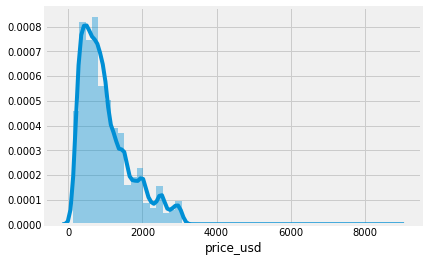

In [578]:
sns.distplot(listing_df['price_usd'])

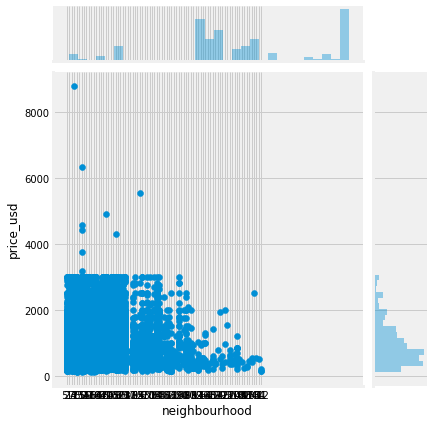

In [506]:
sns.jointplot(x = 'neighbourhood', y = 'price_usd', data = listing_df);

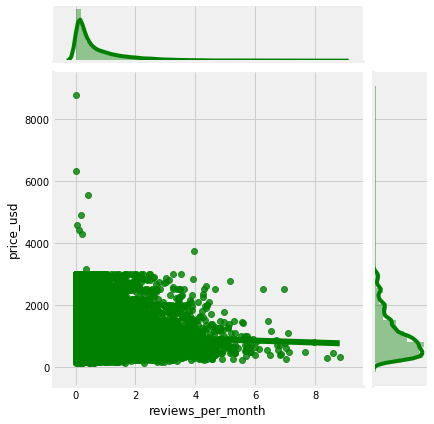

In [542]:
sns.jointplot(x = 'reviews_per_month', y = 'price_usd', data = listing_df, kind = 'reg', color = 'green');

/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


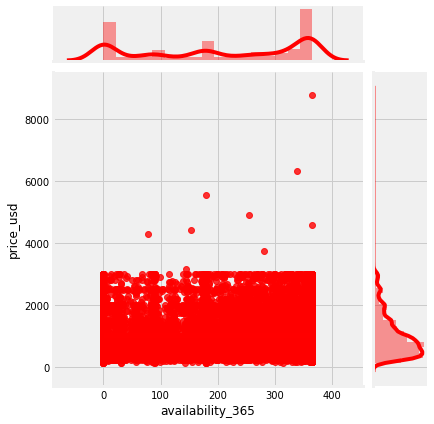

In [543]:
listing_df['availability_log'] = np.log(listing_df['availability_365'])
listing_df['price_log'] = np.log(listing_df['price'])
sns.jointplot(x = 'availability_365', y = 'price_usd', data = listing_df, kind = 'reg', color = 'red');


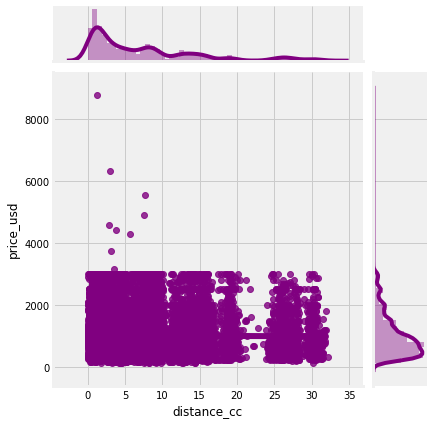

In [609]:
sns.jointplot(x = 'distance_cc', y = 'price_usd', data = listing_df, kind = 'reg', color = 'purple');

In [544]:
listing_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price_usd',
       'availability_log', 'price_log', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

In [545]:
listing_df.price_usd.describe()

count    17255.000000
mean      1009.894837
std        669.562817
min        119.000000
25%        505.000000
50%        830.000000
75%       1344.000000
max       8783.907238
Name: price_usd, dtype: float64

In [559]:
# baseline model

subset = ['neighbourhood', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', ]
x = listing_df[subset]
y = listing_df['price_usd']

dummy_regr = DummyRegressor(strategy = "median")
dummy_regr.fit(x, y)
#DummyRegressor()
y_predict = dummy_regr.predict(y)
R2 = dummy_regr.score(x, y)

rmse = np.sqrt(metrics.mean_squared_error(y, y_predict))

print('rmse: ', rmse, 'r2: ', R2)


rmse:  693.2896480095063 r2:  -0.07219047711717841


NameError: name 'lm' is not defined

In [560]:
rmse = np.sqrt(metrics.mean_squared_error(y, y_predict))
rmse

693.2896480095063

In [561]:
#2nd baseline 
subset2 = ['neighbourhood', 'room_type_Entire home/apt']
x = listing_df[subset2]
y = listing_df['price_usd']

dummy_regr = DummyRegressor(strategy = "mean")
dummy_regr.fit(x, y)
#DummyRegressor()
y_predict = dummy_regr.predict(x)
R2 = dummy_regr.score(x, y)

rmse = np.sqrt(metrics.mean_squared_error(y, y_predict))

print('rmse: ', rmse, 'r2: ', R2)

rmse:  669.5434143725225 r2:  0.0


In [ ]:
641

In [610]:
listing_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price_usd',
       'availability_log', 'price_log', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'distance_cc'],
      dtype='object')

In [637]:
subset3 = ['minimum_nights','number_of_reviews', 'neighbourhood', 'reviews_per_month', 'availability_365', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room','room_type_Shared room', 'distance_cc']


df_features = listing_df[subset3]
target = listing_df['price_usd']
len(subset3)

10

In [612]:
from sklearn.preprocessing import PolynomialFeatures

poly_3 = PolynomialFeatures(degree=3, include_bias = False)
poly3_data = poly_3.fit_transform(df_features)
poly3_columns = poly_3.get_feature_names(df_features.columns)
df_poly3 = pd.DataFrame(poly3_data, columns = poly3_columns)
model3 = LinearRegression()

model3 = model3.fit(df_poly3, target)

In [622]:
poly3_columns

['minimum_nights',
 'number_of_reviews',
 'neighbourhood',
 'reviews_per_month',
 'availability_365',
 'room_type_Entire home/apt',
 'room_type_Hotel room',
 'room_type_Private room',
 'room_type_Shared room',
 'distance_cc',
 'minimum_nights^2',
 'minimum_nights number_of_reviews',
 'minimum_nights neighbourhood',
 'minimum_nights reviews_per_month',
 'minimum_nights availability_365',
 'minimum_nights room_type_Entire home/apt',
 'minimum_nights room_type_Hotel room',
 'minimum_nights room_type_Private room',
 'minimum_nights room_type_Shared room',
 'minimum_nights distance_cc',
 'number_of_reviews^2',
 'number_of_reviews neighbourhood',
 'number_of_reviews reviews_per_month',
 'number_of_reviews availability_365',
 'number_of_reviews room_type_Entire home/apt',
 'number_of_reviews room_type_Hotel room',
 'number_of_reviews room_type_Private room',
 'number_of_reviews room_type_Shared room',
 'number_of_reviews distance_cc',
 'neighbourhood^2',
 'neighbourhood reviews_per_month',
 '

In [658]:
model3 = sm.OLS(y, poly3_data).fit()
model3.summary()

/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_usd   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     10.87
Date:                Wed, 29 Jul 2020   Prob (F-statistic):          2.26e-258
Time:                        17:19:39   Log-Likelihood:            -1.3588e+05
No. Observations:               17255   AIC:                         2.721e+05
Df Residuals:                   17087   BIC:                         2.734e+05
Df Model:                         167                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           185.0888    162.021      1.142      0.253    -132.490     502.667
x2             2.0928     27.295      0.077      0.939     -51.409      55.595
x3            -0.9883      7.520     -0.131      0.895     -15.729      13.752
x4           285.3047    489.571      0.583      0.560    -674.304    1244.914
x5            -0.4579      1.135     -0.403      0.687      -2.682       1.767
x6           458.8543     41.033     11.182      0.000     378.425     539.284
x7           204.1423    298.158      0.685      0.494    -380.278     788.562
x8           264.9024     47.136      5.620      0.000     172.511     357.294
x9          -141.3076    789.378     -0.179      0.858   -1688.570    1405.955
x10            0.1161     42.075      0.003      0.998     -82.356      82.588
x11          -35.1117     25.210     -1.393      0.164     -84.526      14.303
x12           -3.8491      6.149     -0.626      0.531     -15.901       8.203
x13            0.0084      1.046      0.008      0.994      -2.042       2.059
x14            7.8371    170.217      0.046      0.963    -325.805     341.479
x15           -0.0533      0.255     -0.209      0.834      -0.553       0.446
x16         -106.1296     81.020     -1.310      0.190    -264.937      52.678
x17          187.1563    177.997      1.051      0.293    -161.735     536.048
x18         -106.8604     81.086     -1.318      0.188    -265.797      52.076
x19          210.9226    372.565      0.566      0.571    -519.343     941.189
x20           -6.9248      9.049     -0.765      0.444     -24.662      10.813
x21           -0.1529      0.553     -0.276      0.782      -1.238       0.932
x22            0.0371      0.241      0.154      0.878      -0.435       0.509
x23            5.0753     23.044      0.220      0.826     -40.093      50.244
x24            0.0092      0.055      0.168      0.867      -0.098       0.117
x25           -3.9472     13.641     -0.289      0.772     -30.684      22.790
x26           32.5521     30.621      1.063      0.288     -27.467      92.571
x27           -2.6855     13.676     -0.196      0.844     -29.492      24.121
x28          -23.8266     62.277     -0.383      0.702    -145.895      98.242
x29            0.2525      1.170      0.216      0.829      -2.040       2.545
x30           -0.0483      0.057     -0.847      0.397      -0.160       0.063
x31           -2.1074      4.381     -0.481      0.631     -10.695       6.480
x32            0.0013      0.009      0.144      0.885      -0.017       0.019
x33            1.0817      3.667      0.295      0.768      -6.106       8.269
x34           -6.9411      5.755     -1.206      0.228     -18.221       4.339
x35            1.6806      3.697      0.455      0.649      -5.566       8.928
x36            3.1905     17.392      0.183      0.854     -30.900      37.281
x3

In [614]:
#using sklearn.model_selection we will be using the train test split
#we name them as xtrain and ytrain then xtest and ytest
from sklearn.model_selection import train_test_split

#scale data 
scaler = StandardScaler()
x_standin = scaler.fit_transform(df_features)
x_standin = pd.DataFrame(data = target, columns = df_features.columns)

x_train, x_test, y_train, y_test = train_test_split(df_features, target, random_state = 42, test_size=0.2)

print('Training set - Features:', x_train.shape, 'Target:', y_train.shape)
print('Training set - Features:', x_test.shape, 'Target:', y_test.shape)

Training set - Features: (13804, 10) Target: (13804,)
Training set - Features: (3451, 10) Target: (3451,)


In [625]:


model_lr = LinearRegression()
model_lr = model_lr.fit(x_train, y_train)
y_train_pred = model_lr.predict(x_train)
y_test_pred = model_lr.predict(x_test)

y = listing_df['price_usd']
x = df_features



In [638]:
df_features

,minimum_nights,number_of_reviews,neighbourhood,reviews_per_month,availability_365,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,distance_cc
0,3,54,57,0.63,362,1,0,0,0,3.356482
1,2,27,23,0.34,251,1,0,0,0,8.879955
3,5,5,4,0.06,208,0,0,1,0,5.980151
5,14,2,115,0.03,364,1,0,0,0,1.203734
6,2,8,71,0.08,303,1,0,0,0,7.868755
...,...,...,...,...,...,...,...,...,...,...
23836,1,2,115,1.36,330,1,0,0,0,0.506106
23849,1,2,2,1.40,77,1,0,0,0,11.165350
23852,2,1,54,1.00,343,1,0,0,0,2.326342
23992,1,1,5,1.00,172,1,0,0,0,7.933913


In [640]:
out = listing_df.reset_index(drop=True).T.drop_duplicates().T.set_index(listing_df.index)


In [660]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17255 entries, 0 to 24065
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   minimum_nights             17255 non-null  int64  
 1   number_of_reviews          17255 non-null  int64  
 2   neighbourhood              17255 non-null  object 
 3   reviews_per_month          17255 non-null  float64
 4   availability_365           17255 non-null  int64  
 5   room_type_Entire home/apt  17255 non-null  uint8  
 6   room_type_Hotel room       17255 non-null  uint8  
 7   room_type_Private room     17255 non-null  uint8  
 8   room_type_Shared room      17255 non-null  uint8  
 9   distance_cc                17255 non-null  float64
dtypes: float64(2), int64(3), object(1), uint8(4)
memory usage: 1.6+ MB


In [659]:

y = listing_df['price_usd']
x= df_features
x= sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
df_features.columns

In [618]:
#calculate training errors
mae = metrics.mean_absolute_error(y_train, y_train_pred)
mse = metrics.mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', mae )
print('Mean Squared Error:',  mse)
print('Root Mean Squared Error:' , rmse)

Mean Absolute Error: 496.16849561197256
Mean Squared Error: 411401.94582274836
Root Mean Squared Error: 641.4062252759544


In [619]:
#calculte test errors 
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))


print('Mean Absolute Error:', mae )
print('Mean Squared Error:',  mse)
print('Root Mean Squared Error:' , rmse)

Mean Absolute Error: 502.57690116406803
Mean Squared Error: 435441.71367786935
Root Mean Squared Error: 659.8800752241799
